## Joins and More Plotting

For more information on joins, see: http://geopandas.org/mergingdata.html  
For more information on plotting and styling, see: http://geopandas.org/mapping.html

#### This time, we will build on the census tract dataframes we worked with earlier and join them to a GeoDataFrame.

Start by importing pandas as pd, geopandas as gpd, matplotlib.pyplot as plt, and os

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

#### Set your working directory using os to workshopdata/
*Type:*   
*>>> os.chdir('../../')*

In the next cell, *type:*  
*>>> os.getcwd()* to view your current directory.

In [3]:
os.chdir('../../')

In [20]:
os.getcwd()

'/home/jupyter-boaty3'

### Import your data.

Use gpd.read_file() to import the following as a variable named TahoeTracts: TahoeTracts.geojson file from the workshopdata folder.

Use pd.read_csv() to import the following as a variable named AllTracts: the All_Counties.csv you produced in the earlier exercise. Should be in your current working directory.

In [21]:
TahoeTracts = gpd.read_file('workshopdata/TahoeTracts.geojson')

In [22]:
AllTracts = pd.read_csv('workshopdata/All_Counties.csv')

#### View your new TahoeTracts geodataframe and your AllTracts dataframe in the next two cells:

In [23]:
TahoeTracts

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,ShapeSTAre,ShapeSTLen,POP_2010,POP_2011,POP_2012,POP_2013,POP_2014,POP_2015,POP_2016,geometry
0,5,06,017,031600,1400000US06017031600,06017031600,316,CT,7926181,0,...,7.910677e+06,12369.248497,4126,3715,4025,4026,4073,3918,3868,"POLYGON ((763537.9836551668 4315733.585538371,..."
1,7,06,017,030502,1400000US06017030502,06017030502,305.02,CT,17251475,36532,...,1.729684e+07,26313.490214,2641,2767,2446,2296,2340,2408,2393,"POLYGON ((756107.5910784202 4312352.066995064,..."
2,8,06,017,030505,1400000US06017030505,06017030505,305.05,CT,148884104,451002,...,1.494343e+08,64339.455834,2704,1941,2011,2102,2288,2555,2506,"POLYGON ((756288.66584861 4293154.567955514, 7..."
3,9,06,061,020107,1400000US06061020107,06061020107,201.07,CT,7179614,301151,...,7.748818e+06,19336.115918,3510,2966,3240,3355,3111,3279,2974,"POLYGON ((756205.4678623071 4347378.82132867, ..."
4,10,06,061,022100,1400000US06061022100,06061022100,221,CT,59523104,610172,...,6.015945e+07,38311.939639,961,775,964,915,975,695,712,"POLYGON ((737695.3421095964 4329943.931698944,..."
5,12,06,061,022300,1400000US06061022300,06061022300,223,CT,26970758,1445828,...,2.846237e+07,29087.423600,709,774,792,817,738,657,465,"POLYGON ((742251.022959603 4326559.309656151, ..."
6,15,06,061,020105,1400000US06061020105,06061020105,201.05,CT,27538208,917608,...,2.847750e+07,26365.178953,1352,1284,1313,1186,1183,1124,910,"POLYGON ((746500.9871599386 4345515.946135351,..."
7,16,06,017,030401,1400000US06017030401,06017030401,304.01,CT,4779638,541288,...,5.295395e+06,12169.387676,3498,4117,3921,4204,4185,3874,3727,"POLYGON ((758052.428158245 4313674.241877396, ..."
8,17,06,017,032000,1400000US06017032000,06017032000,320,CT,185118854,16702898,...,2.019676e+08,92774.712261,1015,666,681,628,676,667,793,"POLYGON ((741888.4049193002 4322404.514040146,..."
9,18,06,017,030402,1400000US06017030402,06017030402,304.02,CT,10996508,0,...,1.097609e+07,18090.954392,3723,3406,3485,3450,3512,3495,3754,"POLYGON ((757858.6178901512 4308600.865612617,..."


In [24]:
AllTracts

,GEOID,Name of Area,Qualifying Name,State/U.S.-Abbreviation (USPS),Summary Level,Geographic Component,File Identification,Logical Record Number,US,Region,...,Median Household Income (In 2017 Inflation Adjusted Dollars),Housing Units,Occupied Housing Units:,Occupied Housing Units: Owner Occupied,Occupied Housing Units: Renter Occupied,Population for Whom Poverty Status Is Determined:,Population for Whom Poverty Status Is Determined: Under 1.00 (Doing Poorly),Population for Whom Poverty Status Is Determined: 1.00 to 1.99 (Struggling),Population for Whom Poverty Status Is Determined: Under 2.00 (Poor or Struggling),Population for Whom Poverty Status Is Determined: 2.00 and Over (Doing Ok)
0,32005001000,"Census Tract 10, Douglas County, Nevada","Census Tract 10, Douglas County, Nevada",nv,140,0,ACSSF,818,NaN,NaN,...,67805.0,1139,1034,863,171,2520,125,249,374,2146
1,32005001100,"Census Tract 11, Douglas County, Nevada","Census Tract 11, Douglas County, Nevada",nv,140,0,ACSSF,819,NaN,NaN,...,54907.0,2223,2198,1124,1074,5589,492,1174,1666,3923
2,32005001200,"Census Tract 12, Douglas County, Nevada","Census Tract 12, Douglas County, Nevada",nv,140,0,ACSSF,820,NaN,NaN,...,48029.0,1409,1322,759,563,2889,371,441,812,2077
3,32005001300,"Census Tract 13, Douglas County, Nevada","Census Tract 13, Douglas County, Nevada",nv,140,0,ACSSF,821,NaN,NaN,...,73854.0,879,757,700,57,1725,175,236,411,1314
4,32005001400,"Census Tract 14, Douglas County, Nevada","Census Tract 14, Douglas County, Nevada",nv,140,0,ACSSF,822,NaN,NaN,...,54605.0,1624,1455,908,547,3085,389,316,705,2380
5,32005001500,"Census Tract 15, Douglas County, Nevada","Census Tract 15, Douglas County, Nevada",nv,140,0,ACSSF,823,NaN,NaN,...,47435.0,2730,2669,1382,1287,5885,818,1433,2251,3634
6,32005001600,"Census Tract 16, Douglas County, Nevada","Census Tract 16, Douglas County, Nevada",nv,140,0,ACSSF,824,NaN,NaN,...,81750.0,1727,635,499,136,1221,82,58,140,1081
7,32005001700,"Census Tract 17, Douglas County, Nevada","Census Tract 17, Douglas County, Nevada",nv,140,0,ACSSF,825,NaN,NaN,...,50655.0,1281,778,282,496,1730,169,337,506,1224
8,32005001800,"Census Tract 18, Douglas County, Nevada","Census Tract 18, Douglas County, Nevada",nv,140,0,ACSSF,826,NaN,NaN,...,58913.0,1807,1104,753,351,2303,188,422,610,1693
9,32005001900,"Census Tract 19, Douglas County, Nevada","Census Tract 19, Douglas County, Nevada",nv,140,0,ACSSF,827,NaN,NaN,...,135764.0,849,526,437,89,1322,35,138,173,1149


### We will now perform a table join and add the attributes from AllTracts to TahoeTracts. We will join on the 'GEOID' columns.

# But...

#### Look closely at the AllTracts GEOID column. Notice anything? 

*type:*  
*>>> AllTracts.GEOID*

In [25]:
AllTracts.GEOID

0      32005001000
1      32005001100
2      32005001200
3      32005001300
4      32005001400
          ...     
252     6061023600
253     6061023700
254     6061023800
255     6061023900
256     6061990000
Name: GEOID, Length: 257, dtype: int64

### Arrgghh! Classic problem: leading zeros have been stripped. WHY?!?!?!

### Fix it! Reimport the All_Counites.csv file to the same variable, but this time we'll tell pandas the 'GEOID' column should be read as a string.

*Type:*  
*>>> AllTracts = pd.read_csv('All_Counties.csv', DTYPE = {"GEOID":str})

In [27]:
AllTracts = pd.read_csv('workshopdata/All_Counties.csv', dtype={"GEOID":str})

Check the results by *Typing:* AllTracts.GEOID

In [28]:
AllTracts.GEOID

0      32005001000
1      32005001100
2      32005001200
3      32005001300
4      32005001400
          ...     
252    06061023600
253    06061023700
254    06061023800
255    06061023900
256    06061990000
Name: GEOID, Length: 257, dtype: object

#### Hell Yes!

### Next, let's join AllTracts to TahoeTracts, dropping what we don't need from the AllTracts.
Note: TahoeTracts only consists of the census tracts around Lake Tahoe and that there are 25 tracts, but AllTracts represents all the tracts within each county bordering the lake: 257 tracts in total.

*Type:*  
*>>> TahoeTracts = TahoeTracts.merge(AllTracts, on='GEOID')*

In [29]:
TahoeTracts = TahoeTracts.merge(AllTracts, on = 'GEOID')

### Ya did it.

View the results by *typing:*  
*>>> TahoeTracts*

In [30]:
TahoeTracts

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,Median Household Income (In 2017 Inflation Adjusted Dollars),Housing Units,Occupied Housing Units:,Occupied Housing Units: Owner Occupied,Occupied Housing Units: Renter Occupied,Population for Whom Poverty Status Is Determined:,Population for Whom Poverty Status Is Determined: Under 1.00 (Doing Poorly),Population for Whom Poverty Status Is Determined: 1.00 to 1.99 (Struggling),Population for Whom Poverty Status Is Determined: Under 2.00 (Poor or Struggling),Population for Whom Poverty Status Is Determined: 2.00 and Over (Doing Ok)
0,5,06,017,031600,1400000US06017031600,06017031600,316,CT,7926181,0,...,36014.0,3366,1318,234,1084,3017,731,889,1620,1397
1,7,06,017,030502,1400000US06017030502,06017030502,305.02,CT,17251475,36532,...,89583.0,1889,1027,932,95,2624,152,295,447,2177
2,8,06,017,030505,1400000US06017030505,06017030505,305.05,CT,148884104,451002,...,63194.0,2102,921,682,239,2336,129,320,449,1887
3,9,06,061,020107,1400000US06061020107,06061020107,201.07,CT,7179614,301151,...,43793.0,1973,1026,468,558,2614,322,768,1090,1524
4,10,06,061,022100,1400000US06061022100,06061022100,221,CT,59523104,610172,...,80859.0,1413,293,249,44,613,24,82,106,507
5,12,06,061,022300,1400000US06061022300,06061022300,223,CT,26970758,1445828,...,60521.0,1554,199,186,13,372,89,18,107,265
6,15,06,061,020105,1400000US06061020105,06061020105,201.05,CT,27538208,917608,...,63958.0,2019,486,361,125,965,195,45,240,725
7,16,06,017,030401,1400000US06017030401,06017030401,304.01,CT,4779638,541288,...,56339.0,3730,1551,1115,436,3692,323,557,880,2812
8,17,06,017,032000,1400000US06017032000,06017032000,320,CT,185118854,16702898,...,77917.0,2786,256,202,54,596,27,25,52,544
9,18,06,017,030402,1400000US06017030402,06017030402,304.02,CT,10996508,0,...,37868.0,2862,1664,756,908,3919,743,952,1695,2224


### Great! You've added over a hundred columns. This is the same as a "join" in ArcGIS.

#### Let's export this because we will use this file again later.

*Type:*  
*>>> TahoeTracts.to_file('TahoeTracts_geodata.geojson', driver = 'GeoJSON')*

In [31]:
TahoeTracts.to_file('TahoeTracts_geodata.geojson', driver = 'GeoJSON')

## Now let's work on plotting.

Plot it! *Type:*   
*>>> TahoeTracts.plot()*

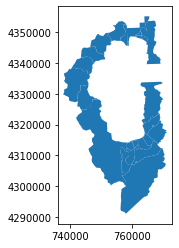

In [32]:
TahoeTracts.plot()

### Now try making a choropleth

First, *Type:*  
*>>> list(TahoeTracts)* to list all of the column headers

In [33]:
list(TahoeTracts)

['OBJECTID',
 'STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'AFFGEOID',
 'GEOID',
 'NAME',
 'LSAD',
 'ALAND',
 'AWATER',
 'County_x',
 'ShapeSTAre',
 'ShapeSTLen',
 'POP_2010',
 'POP_2011',
 'POP_2012',
 'POP_2013',
 'POP_2014',
 'POP_2015',
 'POP_2016',
 'geometry',
 'Name of Area',
 'Qualifying Name',
 'State/U.S.-Abbreviation (USPS)',
 'Summary Level',
 'Geographic Component',
 'File Identification',
 'Logical Record Number',
 'US',
 'Region',
 'Division',
 'State (Census Code)',
 'State (FIPS)',
 'County_y',
 'County Subdivision (FIPS)',
 'Place (FIPS Code)',
 'Place (State FIPS + Place FIPS)',
 'Census Tract',
 'Block Group',
 'Consolidated City',
 'American Indian Area/Alaska Native Area/Hawaiian Home Land (Census)',
 'American Indian Area/Alaska Native Area/Hawaiian Home Land (FIPS)',
 'American Indian Trust Land/Hawaiian Home Land Indicator',
 'American Indian Tribal Subdivision (Census)',
 'American Indian Tribal Subdivision (FIPS)',
 'Alaska Native Regional Corporation (FIPS)',
 'Metr

#### Next, 

*Type:*  
*>>> TahoeTracts.plot('a column name')*

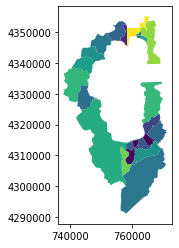

In [34]:
TahoeTracts.plot('Median Household Income (In 2017 Inflation Adjusted Dollars)')

#### Add a legend

*Type:*  
*>>> TahoeTracts.plot('Median Household Income (In 2017 Inflation Adjusted Dollars)', legend=True)*

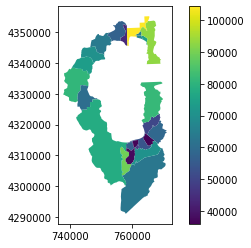

In [35]:
TahoeTracts.plot('Median Household Income (In 2017 Inflation Adjusted Dollars)', legend = True)

#### Change the figure size

*Type:*  
*>>> TahoeTracts.plot('Median Household Income (In 2017 Inflation Adjusted Dollars)', legend=True, figsize = (8,8))*

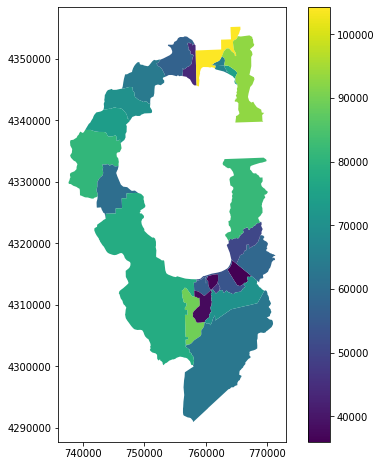

In [36]:
TahoeTracts.plot('Median Household Income (In 2017 Inflation Adjusted Dollars)', legend = True, figsize = (8,8))

#### Next, modify the color scheme

*Type:*  
*>>>TahoeTracts.plot('Median Household Income (In 2017 Inflation Adjusted Dollars)', legend=True, figsize = (8,8), cmap='OrRd')*

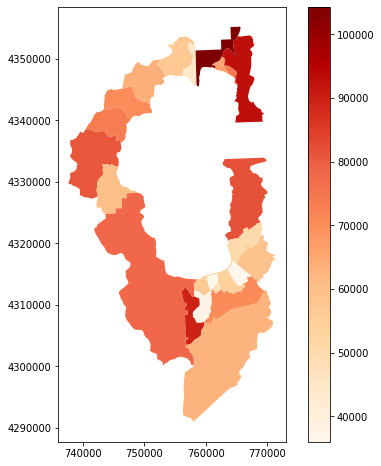

In [37]:
TahoeTracts.plot('Median Household Income (In 2017 Inflation Adjusted Dollars)', 
                 legend = True, 
                 figsize = (8,8), 
                 cmap='OrRd'
                )

#### You love this *beautiful* map! So Save it as an image!

Past your code form the previous cell into the cell below. Press enter to add a second line, then *Type:*  
*>>> plt.savefig('TahoeMHHI.png')*

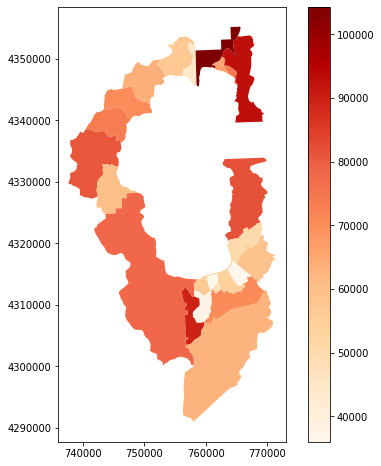

In [39]:
TahoeTracts.plot('Median Household Income (In 2017 Inflation Adjusted Dollars)', 
                 legend = True, 
                 figsize = (8,8), 
                 cmap='OrRd'
                )

plt.savefig('TahoeMHHI.png')

## Done! Open up yor data folder and double click on TahoeMHHI.png to view



#### Bonus! Want to add another layer?

Add a points of interest layer:

*Type:*  
*>>> POIs = gpd.read_file('workshopdata/Tahoe_POIs.geojson)*

In [40]:
POIs = gpd.read_file('workshopdata/Tahoe_POIs.geojson')

#### Now, as before, use TahoeTracts.plot(), but you will make it a variable named 'basemap'

*In the next cell, first type:*   
*>>> basemap = TahoeTracts.plot()*

#### Then, plot the 'POIs' layer and pass 'ax = basemap' as the only arguement (that is, put it in the parentheses)

*In a new line in the same cell, type:*   
*>>> POIs.plot(ax = basemap)*

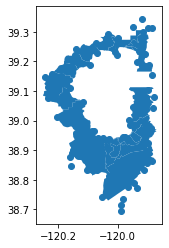

In [45]:
basemap = TahoeTracts.plot()

POIs.plot(ax = basemap)

In [1]:
#### Hey, what the heck?! I thought this was supposed to work.

## Time for you to troubleshoot. What do you think the problem is? How might you fix it?

In [42]:
TahoeTracts.crs

{'init': 'epsg:26910'}

In [43]:
POIs.crs

{'init': 'epsg:4326'}

In [44]:
TahoeTracts = TahoeTracts.to_crs(epsg = 4326)

#### You have two layers displayed, but now let's sytle them

Past the above code into the next cell, but add styling parameters to TahoeTracts: 

Modify 'basemap' adding *color='white', edgecolor='blue', figsize = (8,8)* into the TahoeTracts.plot() parentheses

for POIs.plot(), add *color = 'red'* into POIS.plot() parentheses

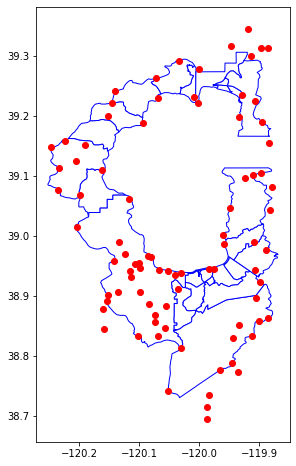

In [48]:
basemap = TahoeTracts.plot(color = 'white', 
                           edgecolor='blue', 
                           figsize=(8,8))

POIs.plot(ax = basemap, color = 'red')